# Constant Model

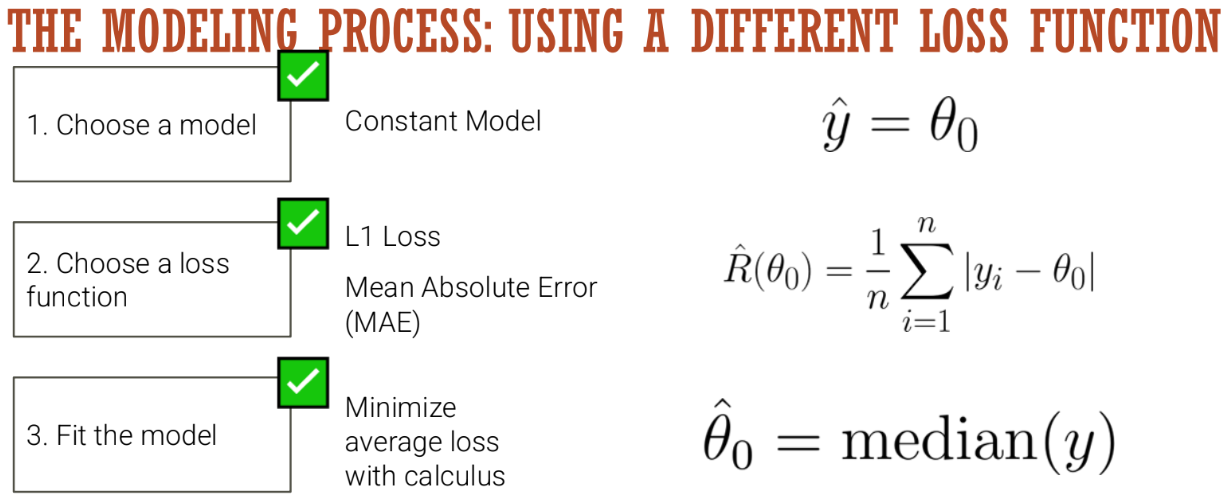

## 2.Choose a Lose Function

### Mean Absolute Error (MAE)

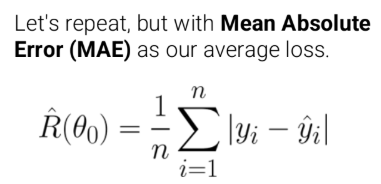

## 3.Fit the Model

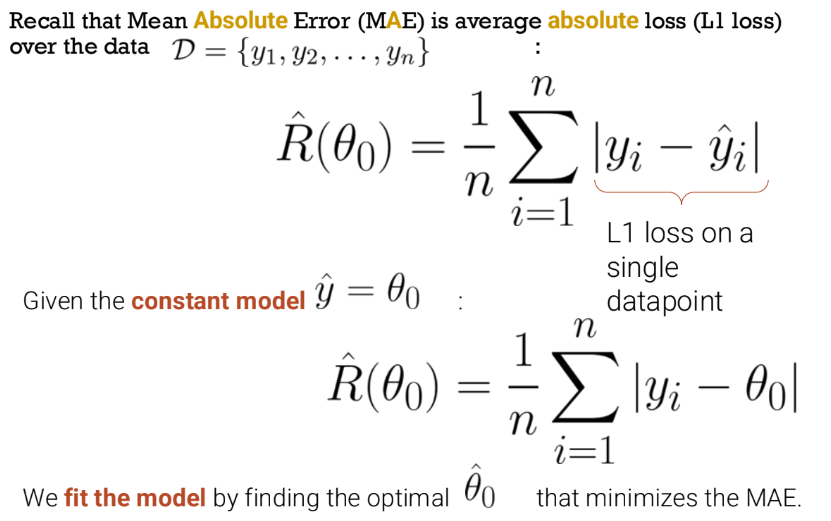

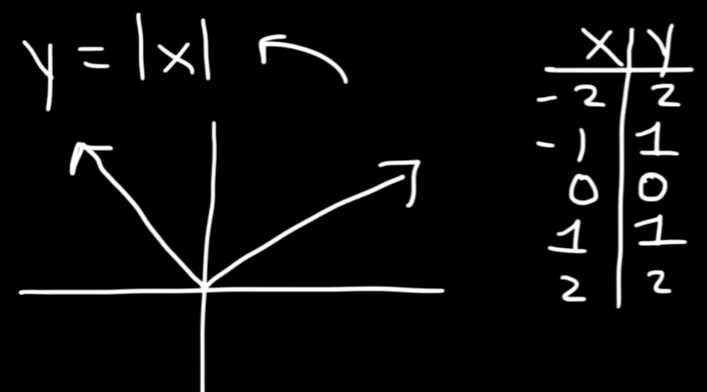

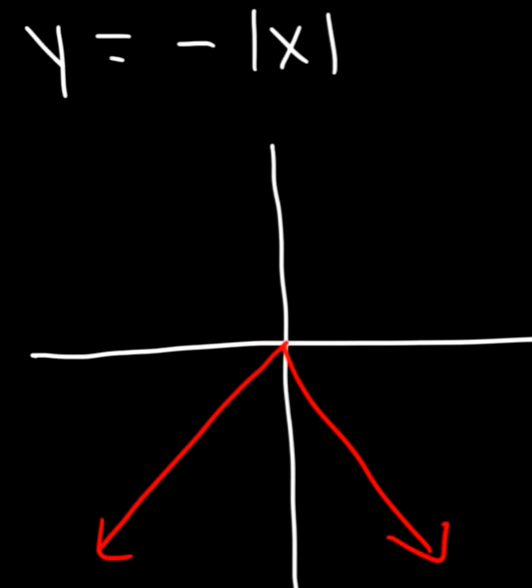

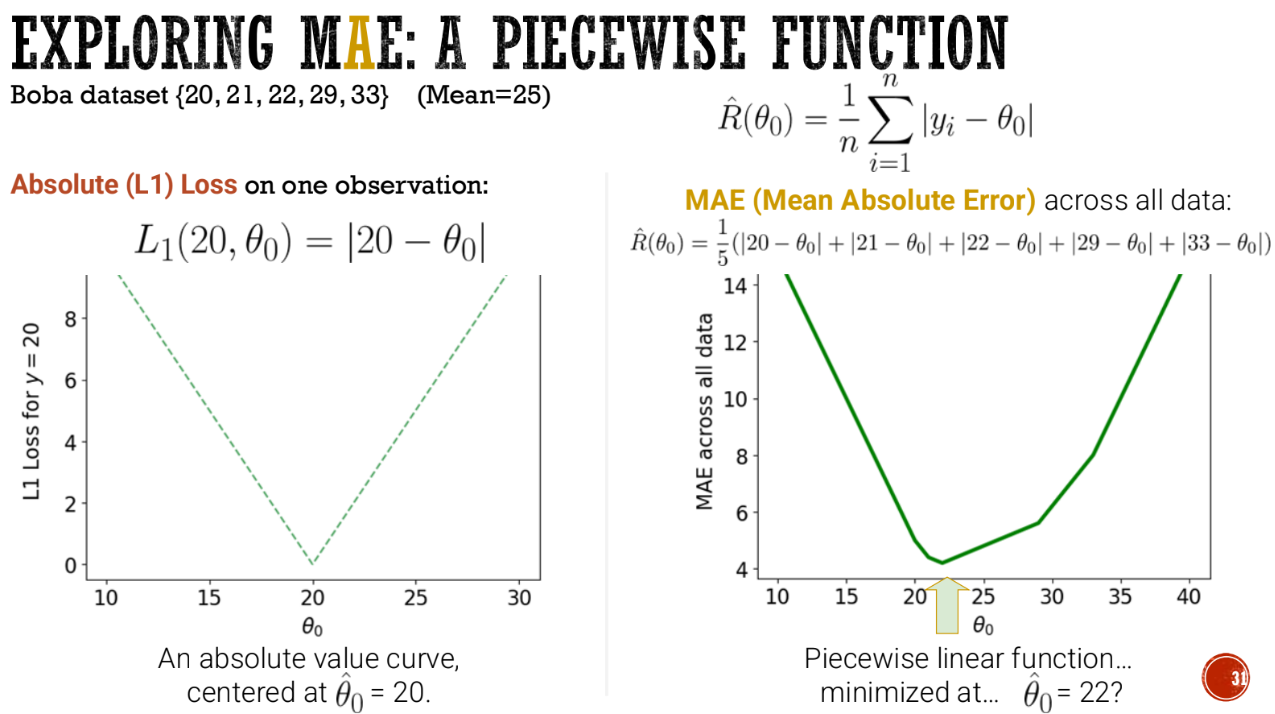

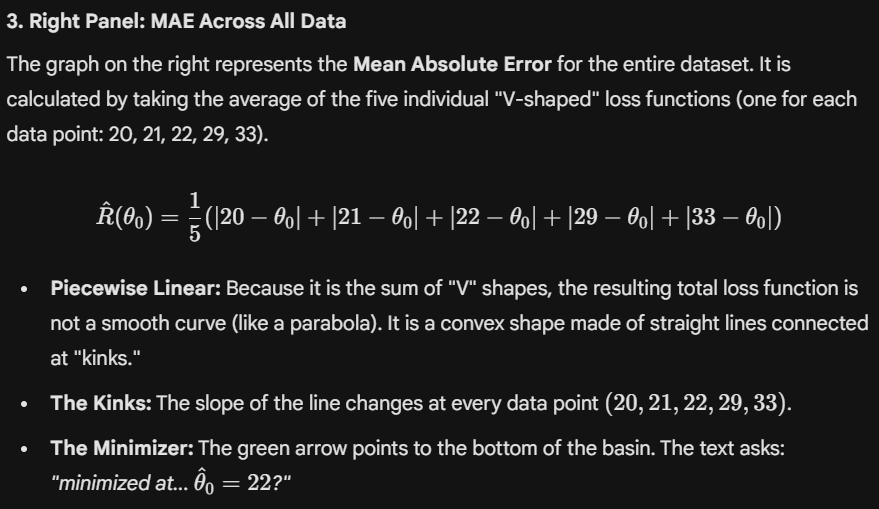

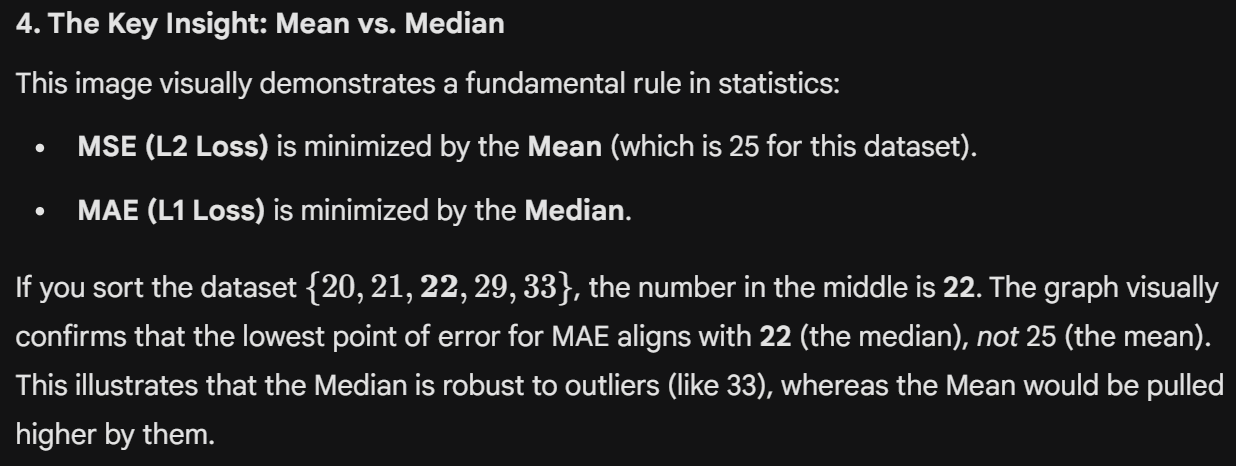

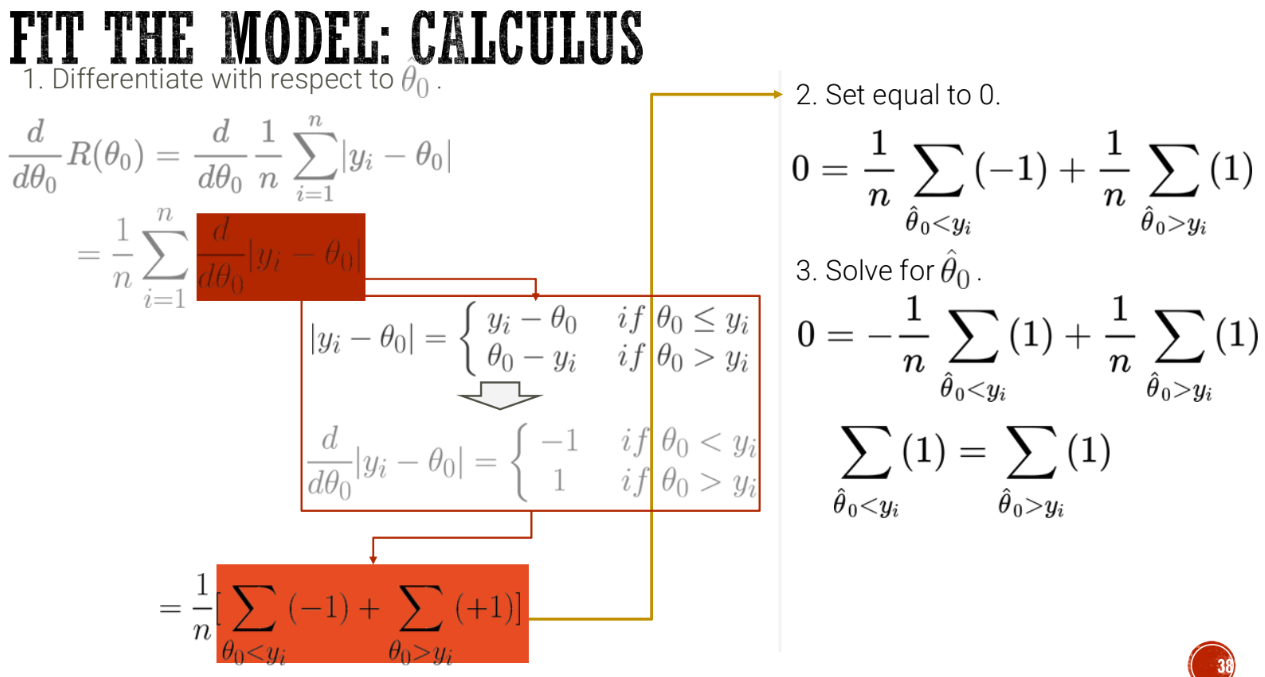

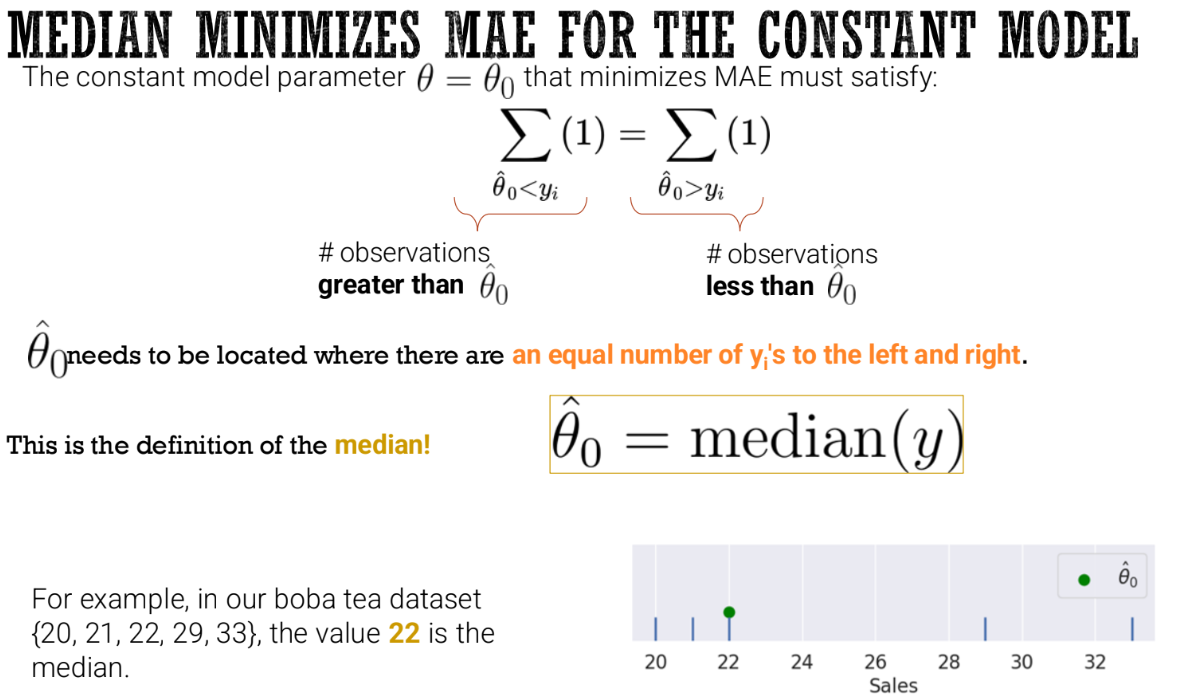

## 4.Evaluate Model Performance

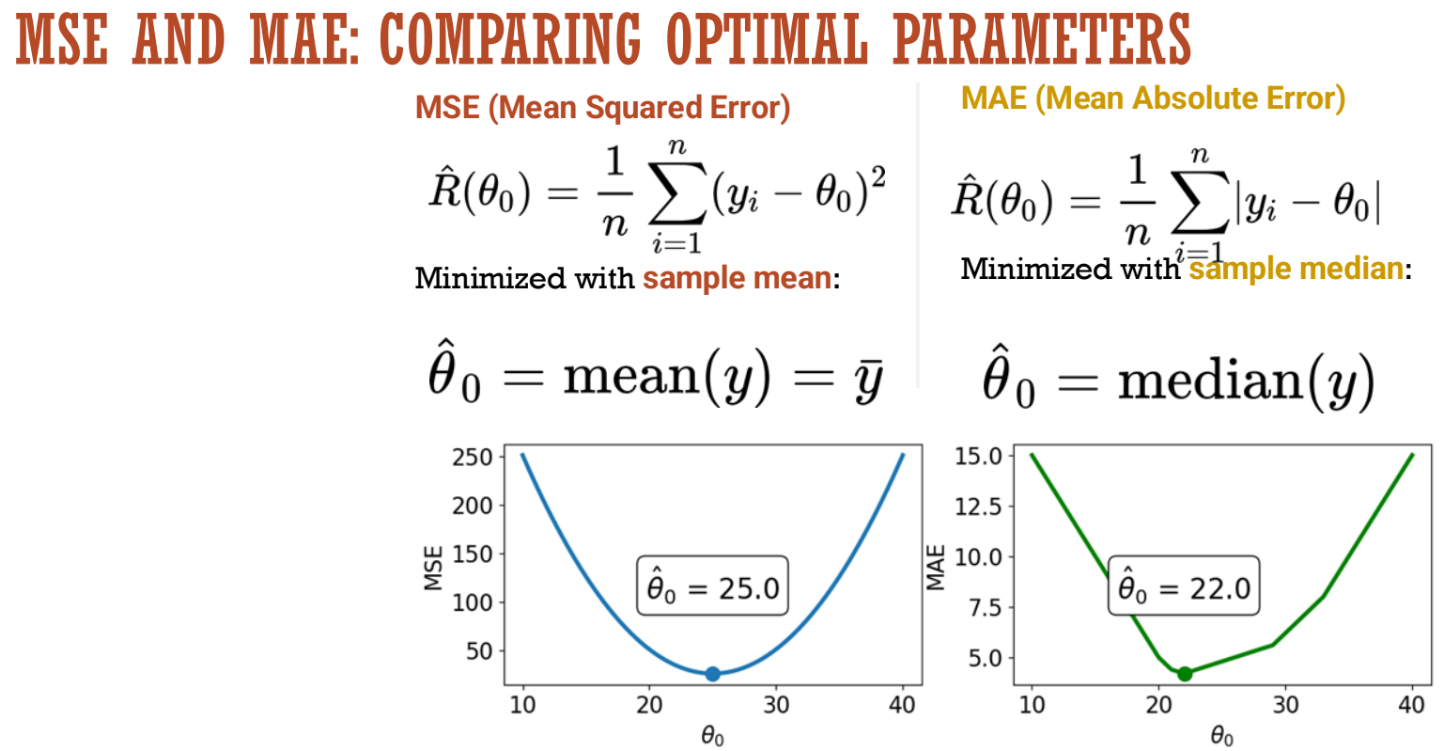

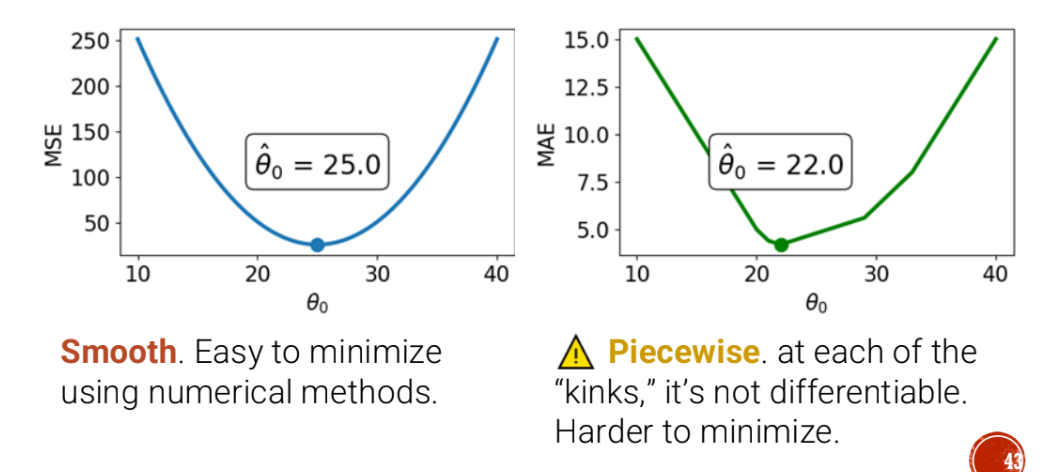

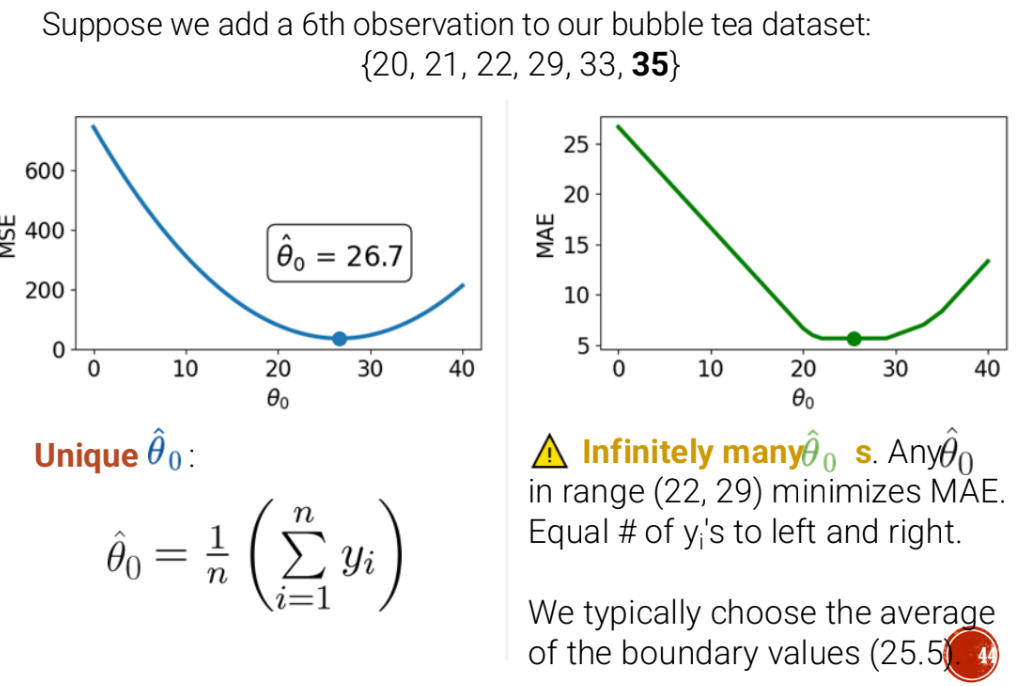

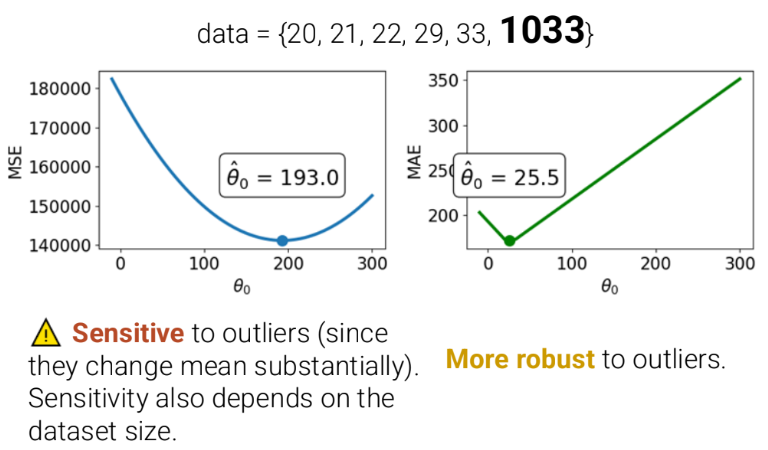

# Transformations of Linear Models (Least Squares Regression)

The residual plot of a good regression shows no pattern.

That is, no relationship between the independent variable x and the errors.

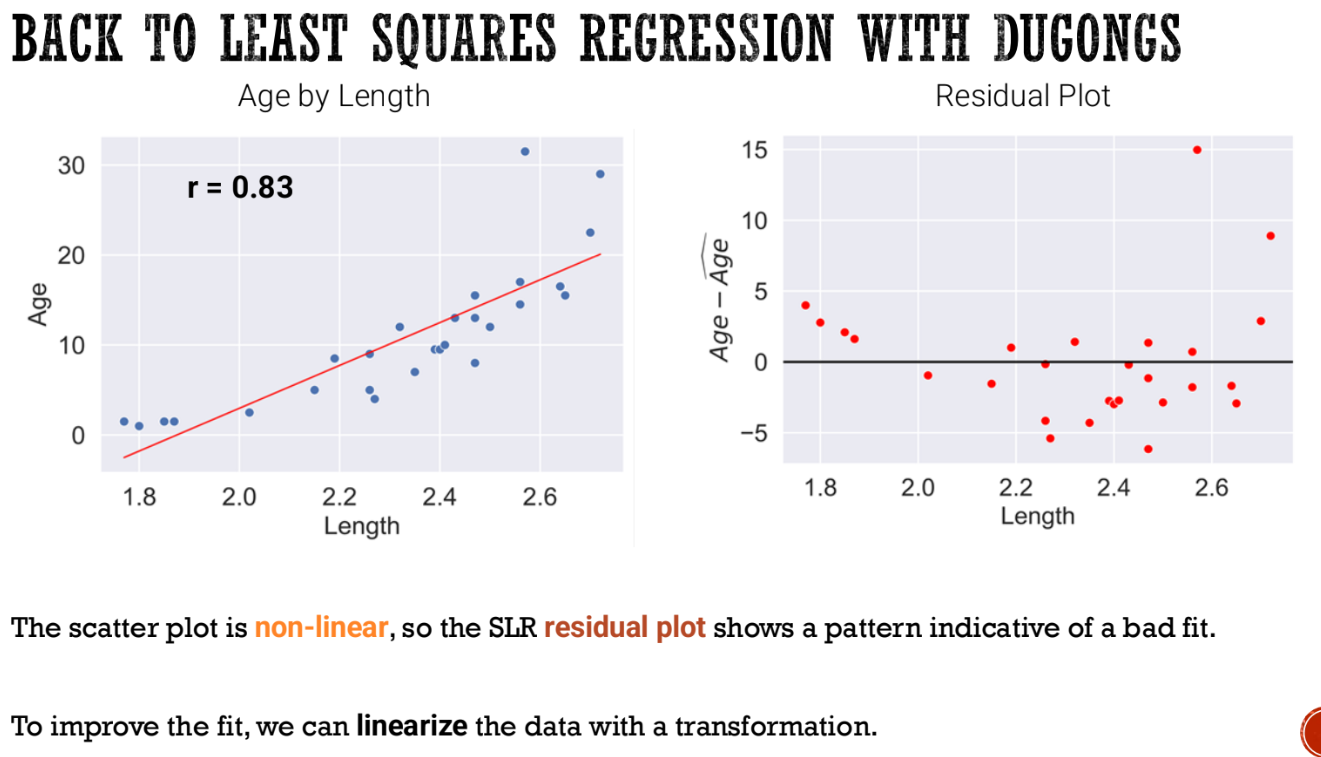

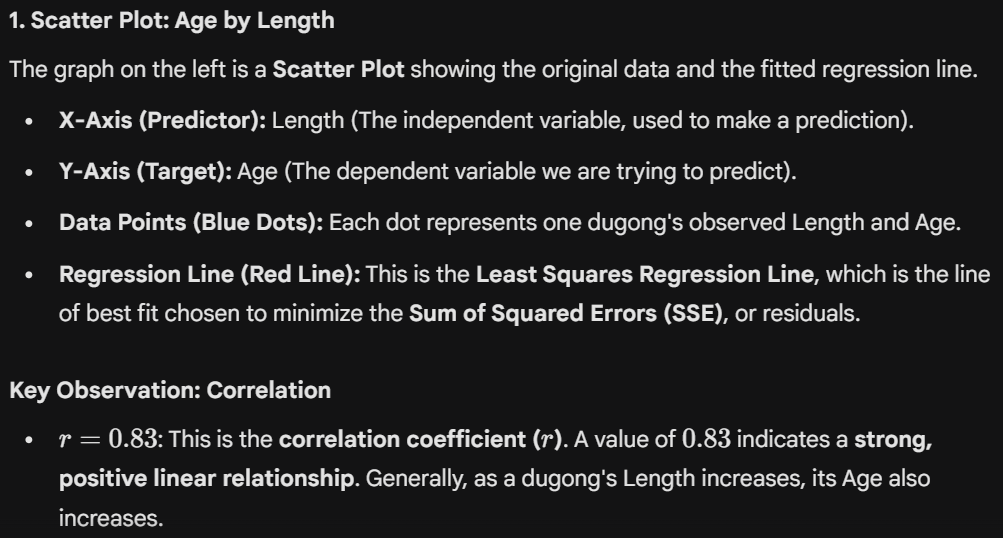

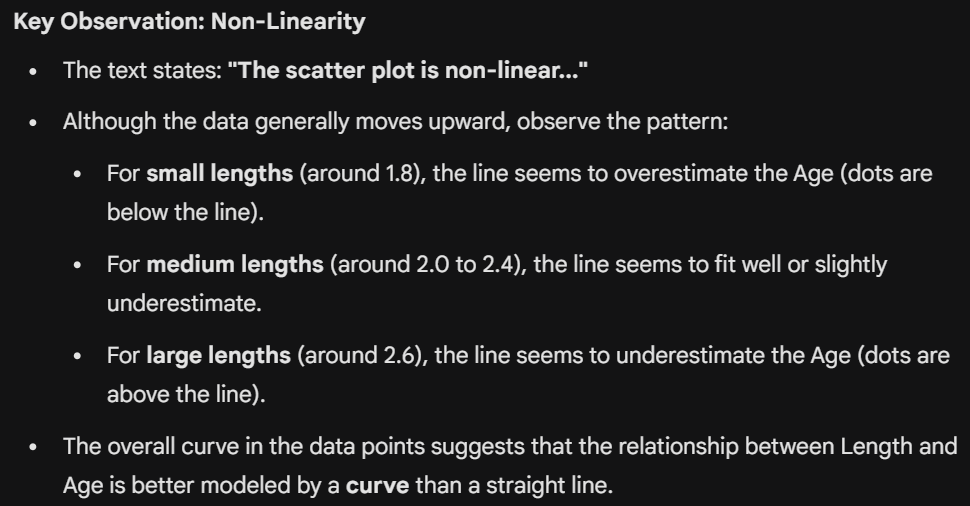

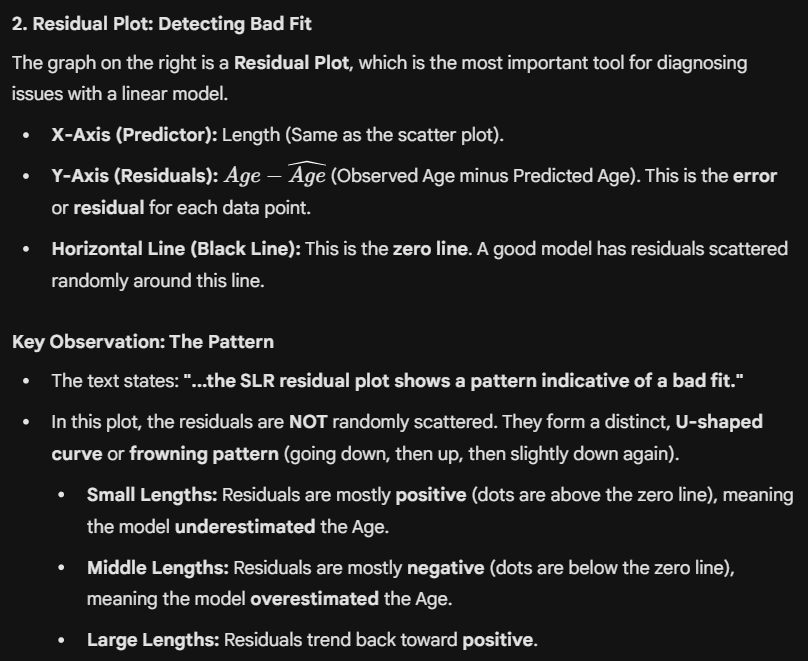

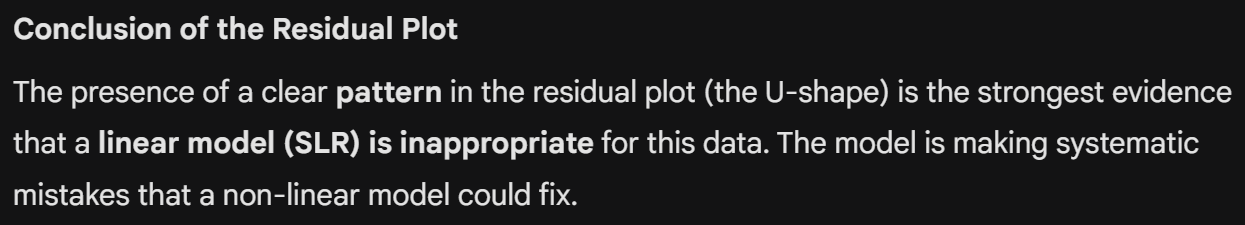

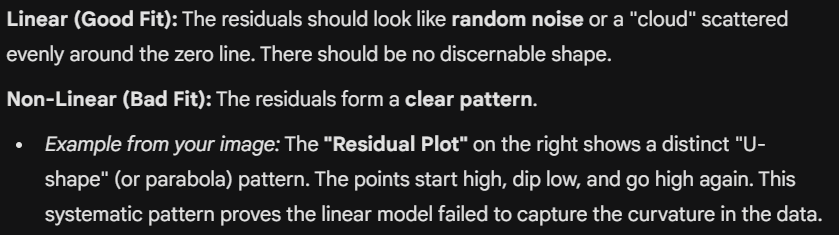

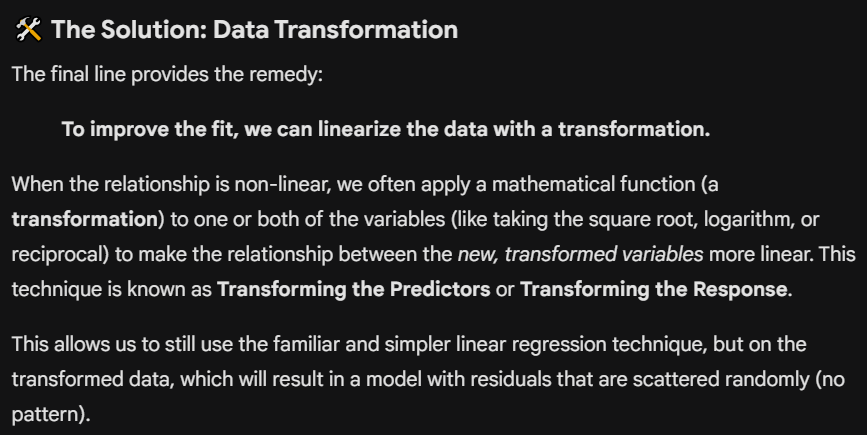

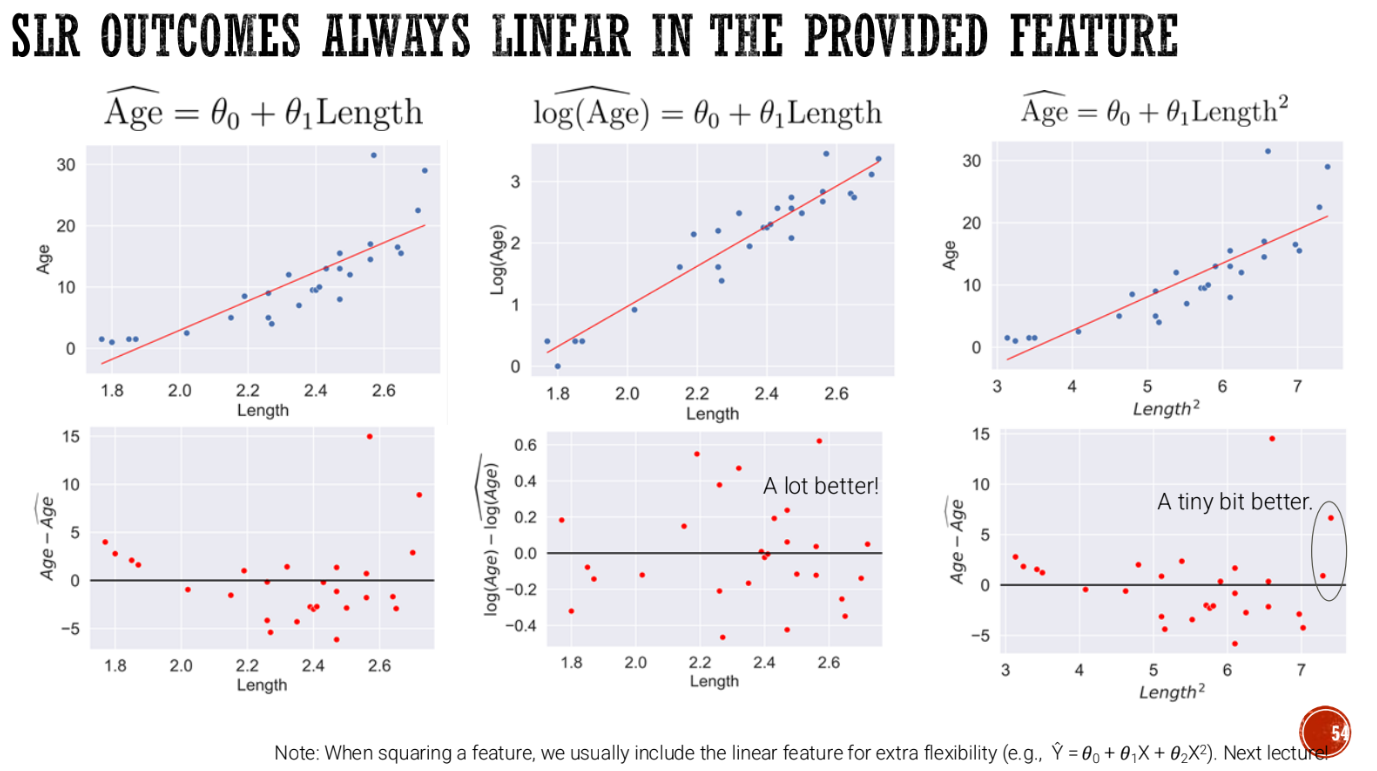

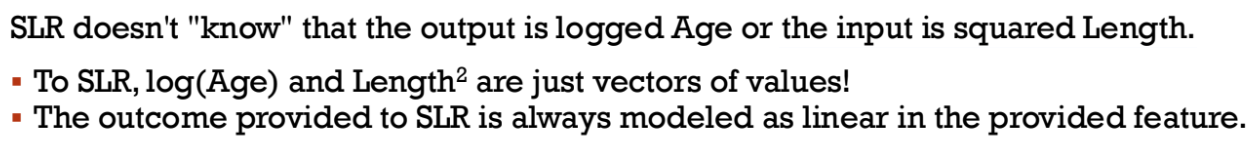

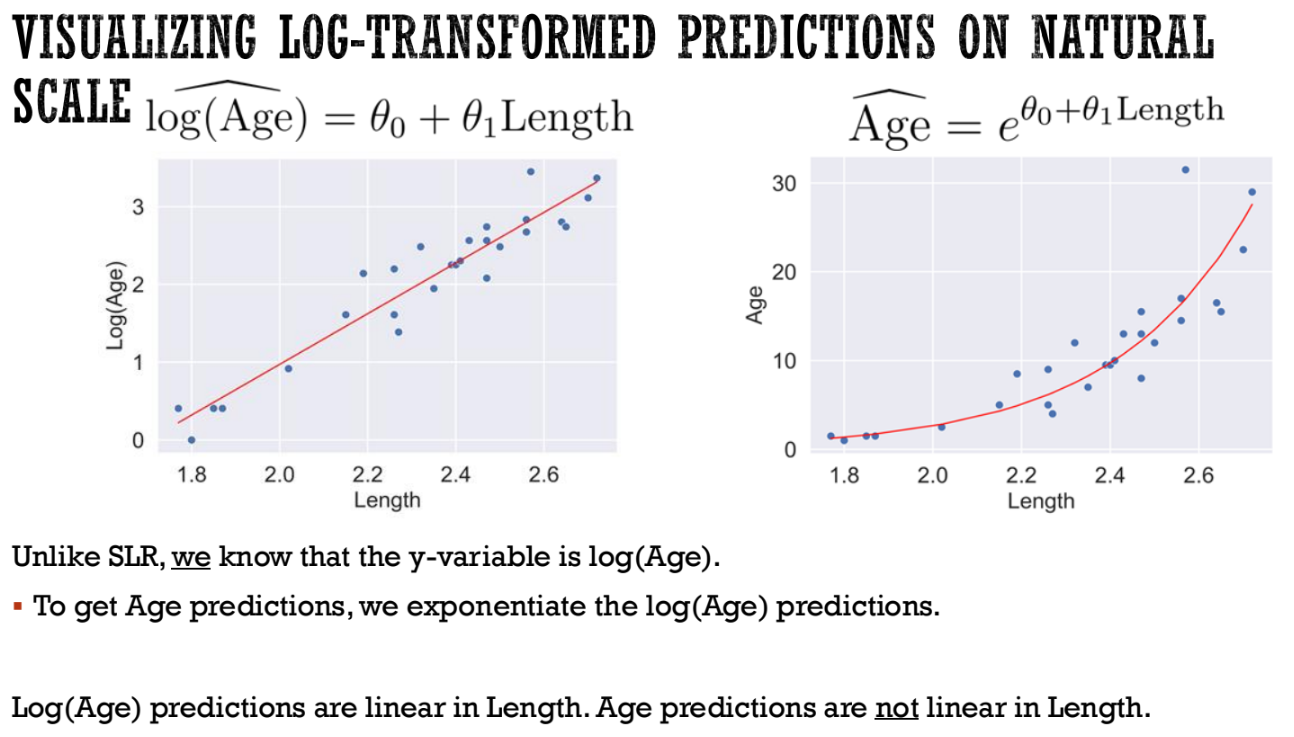

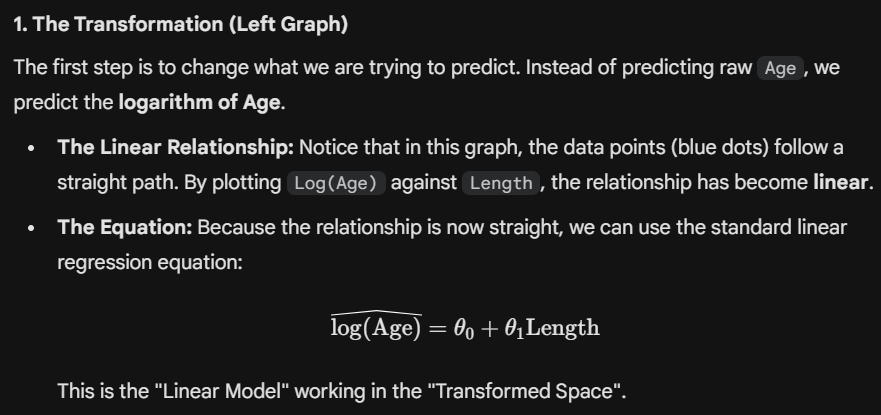

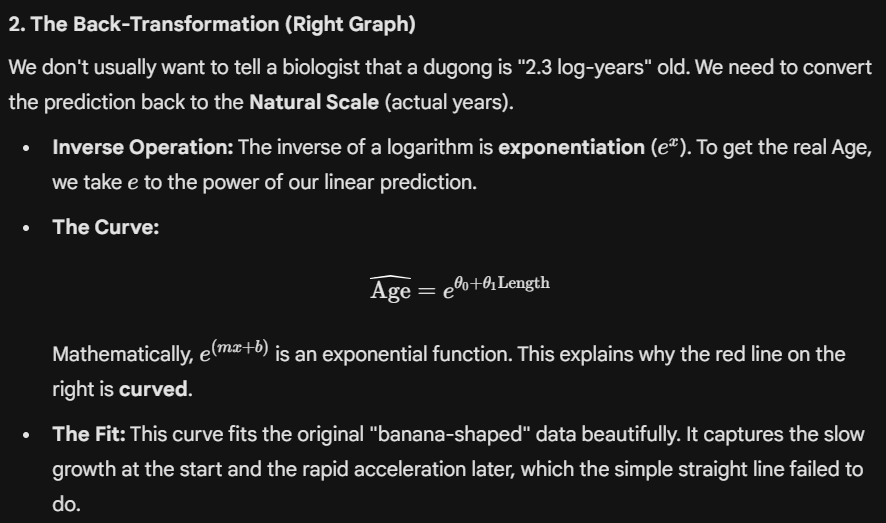

# Comparison with SLR

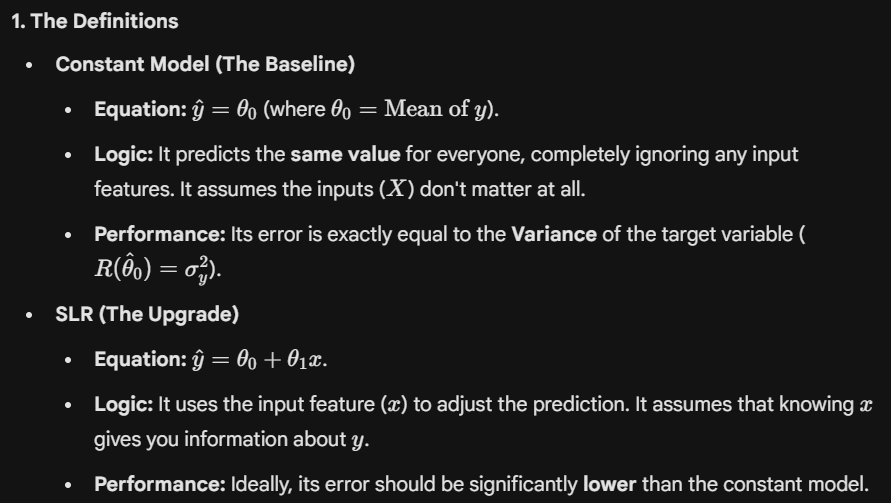

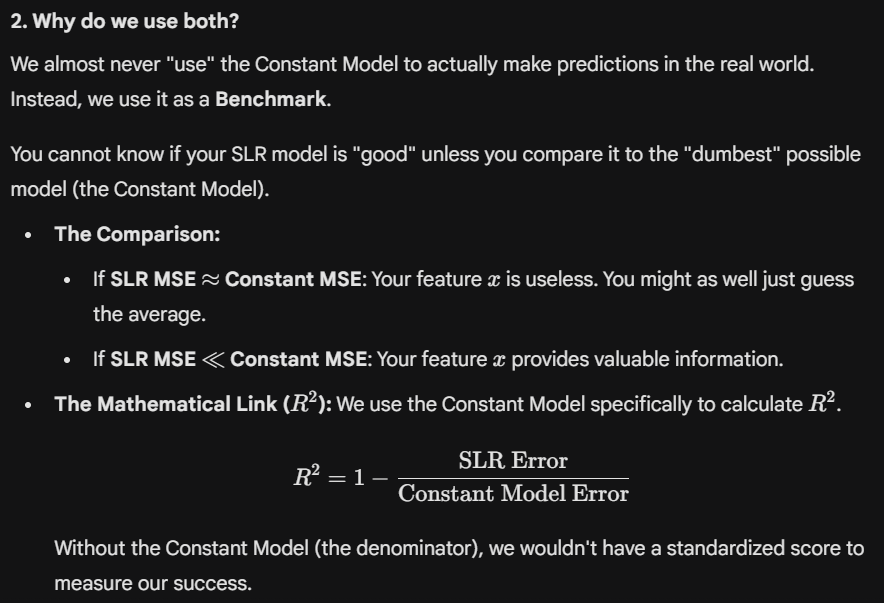

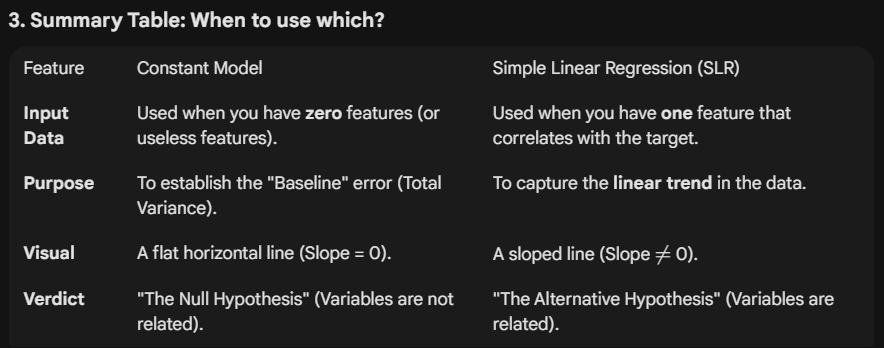

# Code

## Simple Linear Regression (SLR)

### Manual

   Hours_X  Scores_Y
0        1        12
1        2        19
2        3        29
3        4        37
4        5        45
5        6        54
6        7        65
7        8        78
8        9        88
9       10        98


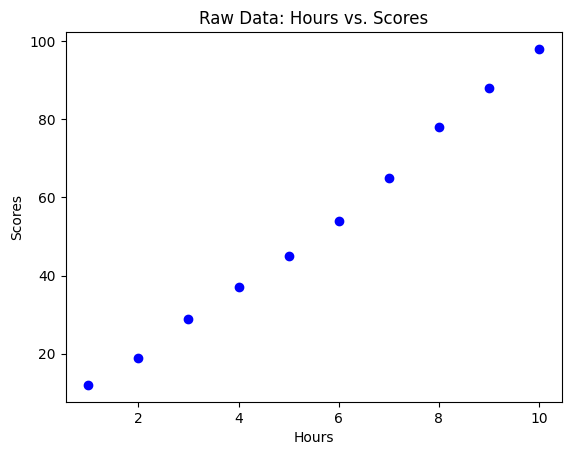

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
  # X: Hours Studied
  'Hours_X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  # y: Test Score (roughly 10x hours + some noise)
  'Scores_Y': [12, 19, 29, 37, 45, 54, 65, 78, 88, 98]
}

df = pd.DataFrame(data)

# Visual check
print(df)

plt.scatter(df['Hours_X'], df['Scores_Y'], color='blue')
plt.title("Raw Data: Hours vs. Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [ ]:
r = df.corr()
print(r)
r = r.loc['Scores_Y', 'Hours_X']
print(f"\nCorrelation: {r:.4}")

std_x = df['Hours_X'].std()
std_y = df['Scores_Y'].std()

print(f"\nStd_x: {std_x:.4}")
print(f"Std_y: {std_y:.4}")

slope = r * (std_y / std_x)
print(f"\nSlope: {slope:.4}")

intercept = df['Scores_Y'].mean() - slope * df['Hours_X'].mean()
print(f"Intercept: {intercept:.4}")

          Hours_X  Scores_Y
Hours_X   1.00000   0.99733
Scores_Y  0.99733   1.00000

Correlation: 0.9973

Std_x: 3.028
Std_y: 29.35

Slope: 9.667
Intercept: -0.6667


In [ ]:
yHat = list()

for x in df['Hours_X']:
  pred = intercept + slope * x
  yHat.append(pred)


df['Predicted_Scores_SLR'] = np.array(yHat).round(2)
df['Residual'] = (df['Scores_Y'] - df['Predicted_Scores_SLR']).round(2)
print(df)

MSE = ((df['Residual']**2).sum()) / len(df)
print(f"\nMSE: {MSE:.4}")

   Hours_X  Scores_Y  Predicted_Scores_SLR  Residual
0        1        12                  9.00      3.00
1        2        19                 18.67      0.33
2        3        29                 28.33      0.67
3        4        37                 38.00     -1.00
4        5        45                 47.67     -2.67
5        6        54                 57.33     -3.33
6        7        65                 67.00     -2.00
7        8        78                 76.67      1.33
8        9        88                 86.33      1.67
9       10        98                 96.00      2.00

MSE: 4.133


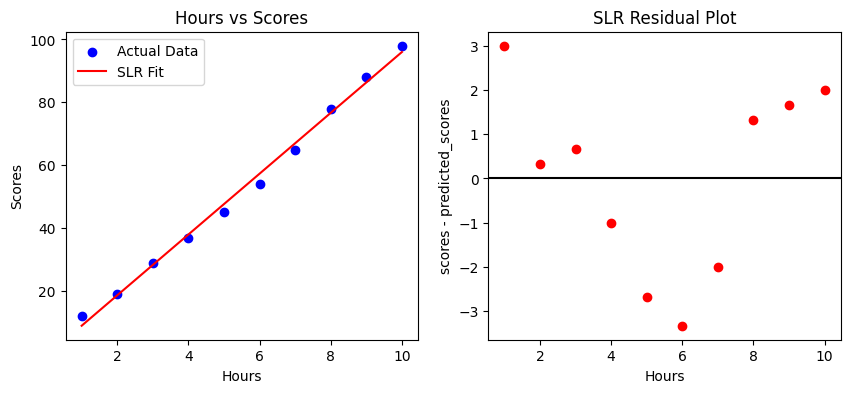

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(df['Hours_X'], df['Scores_Y'], color="blue", label="Actual Data")
plt.plot(df['Hours_X'], df['Predicted_Scores_SLR'], color="red", label="SLR Fit")
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(df['Hours_X'], df['Residual'], color="red")
plt.axhline(y=0, color="black")
plt.title("SLR Residual Plot")
plt.xlabel("Hours")
plt.ylabel("scores - predicted_scores")

plt.show()

### With Built-in Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# --- 1. Create the Dugong Data ---
# Note: The data is estimated from the provided plot,
# but it captures the non-linear trend.
data = {
    'Length': [1.8, 1.85, 1.9, 2.0, 2.1, 2.2, 2.25, 2.3, 2.4, 2.5, 2.6, 2.7],
    'Age':    [0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0, 15.0, 20.0, 30.0]
}
df = pd.DataFrame(data)

# --- 2. Define X (Feature) and y (Target) ---
# X must be a 2D array (required by sklearn)
X = df[['Length']]
y = df['Age']

print("Data Head:")
print(df)
print("-" * 30)

Data Head:
    Length   Age
0     1.80   0.5
1     1.85   1.0
2     1.90   2.0
3     2.00   3.0
4     2.10   4.0
5     2.20   5.0
6     2.25   7.0
7     2.30   8.0
8     2.40  10.0
9     2.50  15.0
10    2.60  20.0
11    2.70  30.0
------------------------------


In [ ]:
# --- 3. Initialize the Model ---
slr_model = LinearRegression()

# --- 4. Train the Model (Fit the Line) ---
slr_model.fit(X, y)

# --- 5. Extract Coefficients (the line: y = m*x + b) ---
# m (slope)
slope = slr_model.coef_[0]
# b (intercept)
intercept = slr_model.intercept_

print(f"SLR Equation (Age = m*Length + b):")
print(f"Age_hat = {slope:.2f} * Length + {intercept:.2f}")
print("-" * 30)

SLR Equation (Age = m*Length + b):
Age_hat = 27.52 * Length + -52.21
------------------------------


In [ ]:
# --- 6. Make Predictions ---
y_pred_slr = slr_model.predict(X)

# --- 7. Evaluate the Model (Calculate Loss/Error) ---
# We use Mean Squared Error (MSE) because the model was fit using Least Squares
mse_slr = mean_squared_error(y, y_pred_slr)

print("SLR Predictions vs. Actual Age:")
results_df = df.copy()
results_df['Predicted_Age_SLR'] = y_pred_slr.round(2)
results_df['Residual'] = (y - y_pred_slr).round(2)
print(results_df)

print(f"\nMean Squared Error (MSE) for SLR: {mse_slr:.2f}")
print("-" * 30)

SLR Predictions vs. Actual Age:
    Length   Age  Predicted_Age_SLR  Residual
0     1.80   0.5              -2.68      3.18
1     1.85   1.0              -1.30      2.30
2     1.90   2.0               0.08      1.92
3     2.00   3.0               2.83      0.17
4     2.10   4.0               5.58     -1.58
5     2.20   5.0               8.33     -3.33
6     2.25   7.0               9.71     -2.71
7     2.30   8.0              11.09     -3.09
8     2.40  10.0              13.84     -3.84
9     2.50  15.0              16.59     -1.59
10    2.60  20.0              19.34      0.66
11    2.70  30.0              22.09      7.91

Mean Squared Error (MSE) for SLR: 10.81
------------------------------


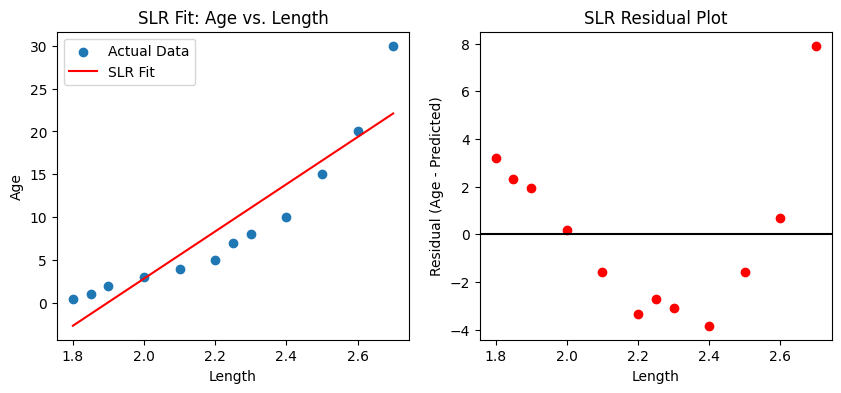

In [ ]:
import matplotlib.pyplot as plt

# This creates the empty "paper" or canvas we will draw on.
# (10, 4) sets the size: 10 inches wide by 4 inches tall. This makes the image wide enough to fit two graphs side-by-side comfortably.
plt.figure(figsize=(10, 4))

# Scatter Plot with Regression Line
plt.subplot(1, 2, 1) # This code divides the canvas into a grid: 1 Row, 2 Columns, The last 1 means "Activate the 1st (left) slot."

plt.scatter(df['Length'], df['Age'], label='Actual Data')
plt.plot(df['Length'], y_pred_slr, color='red', label='SLR Fit')
plt.title('SLR Fit: Age vs. Length')
plt.xlabel('Length')
plt.ylabel('Age')

# .legend() looks for the label= parts in the previous commands ("Actual Data", "SLR Fit") and creates a small key box showing which color means what.
plt.legend()

# Residual Plot (Error Check)
plt.subplot(1, 2, 2)

# Plot residuals against the predictor (Length)
plt.scatter(df['Length'], results_df['Residual'], color='red')
plt.axhline(y=0, color="black") # This represents "Zero Error" (a perfect prediction).
plt.title('SLR Residual Plot')
plt.xlabel('Length')
plt.ylabel('Residual (Age - Predicted)')
plt.show()

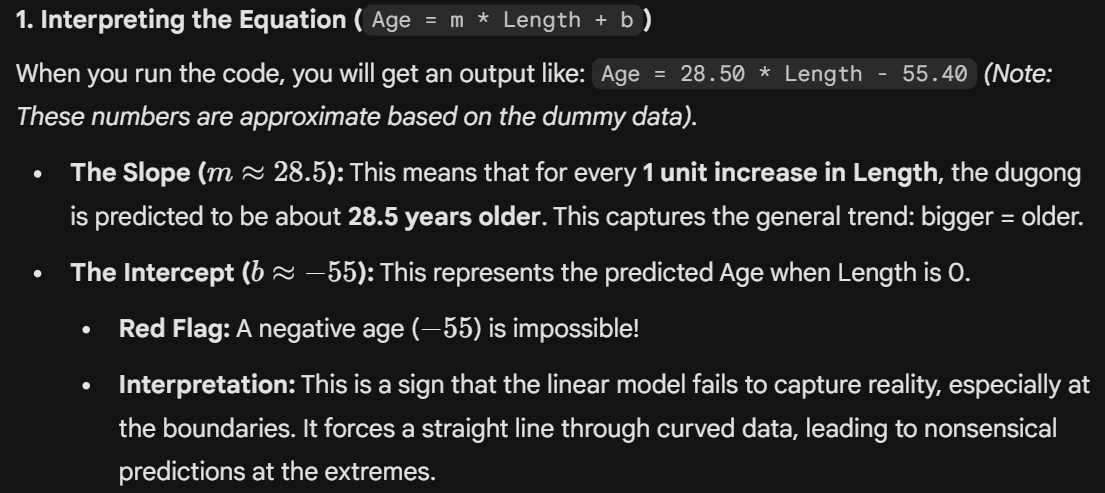

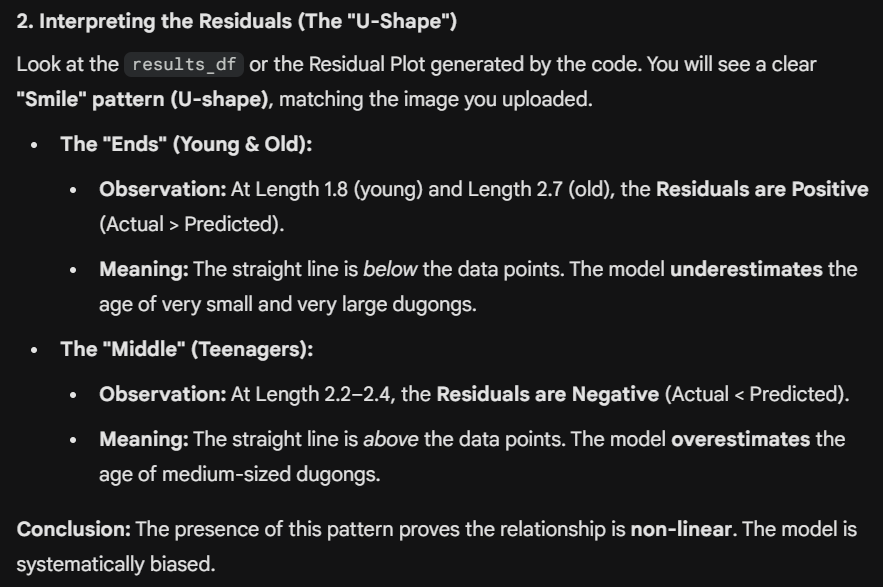

## Constant Model

### MSE Loss Function

Optimal Parameter (Mean): 52.5
Predictions: [52.5 52.5 52.5 52.5 52.5 52.5 52.5 52.5 52.5 52.5]
MSE of Constant Model: 775.05
Variance of Target (y): 775.05


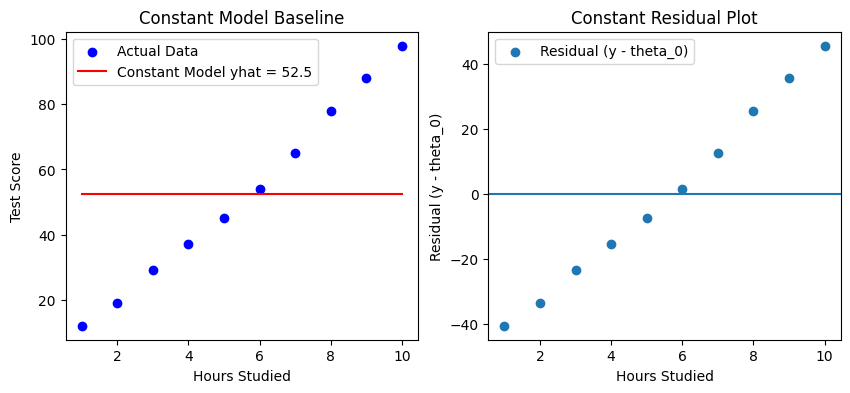

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Data (Study Hours vs Scores) ---
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([12, 19, 29, 37, 45, 54, 65, 78, 88, 98])

# --- 2. Training (Find theta_0) ---
# For MSE (Least Squares), the optimal constant is the MEAN.
theta_0 = np.mean(y)

print(f"Optimal Parameter (Mean): {theta_0}")

# --- 3. Prediction ---
# The prediction is the same for every single student
# We create an array of the same size as X, filled with theta_0 for visualization
y_pred_constant = np.full(shape=X.shape, fill_value=theta_0)
print(f"Predictions: {y_pred_constant}")

# --- 4. Evaluation (MSE) ---
# Calculate the average squared difference from the mean
mse_constant = np.mean((y - theta_0) ** 2)

# Note: This is exactly equal to the Variance of y!
variance_y = np.var(y)

print(f"MSE of Constant Model: {mse_constant:.2f}")
print(f"Variance of Target (y): {variance_y:.2f}")

# --- 5. Visualization ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_constant, color='red', label=f'Constant Model yhat = {theta_0}')
plt.title("Constant Model Baseline")
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.legend() # To show small key box showing which color means what.

plt.subplot(1,2,2)
plt.scatter(X, (y - theta_0), label="Residual (y - theta_0)")
plt.axhline(y=0)
plt.title("Constant Residual Plot")
plt.xlabel("Hours Studied")
plt.ylabel("Residual (y - theta_0)")
plt.legend()

plt.show()

Image from previously calculated SLR on this same data

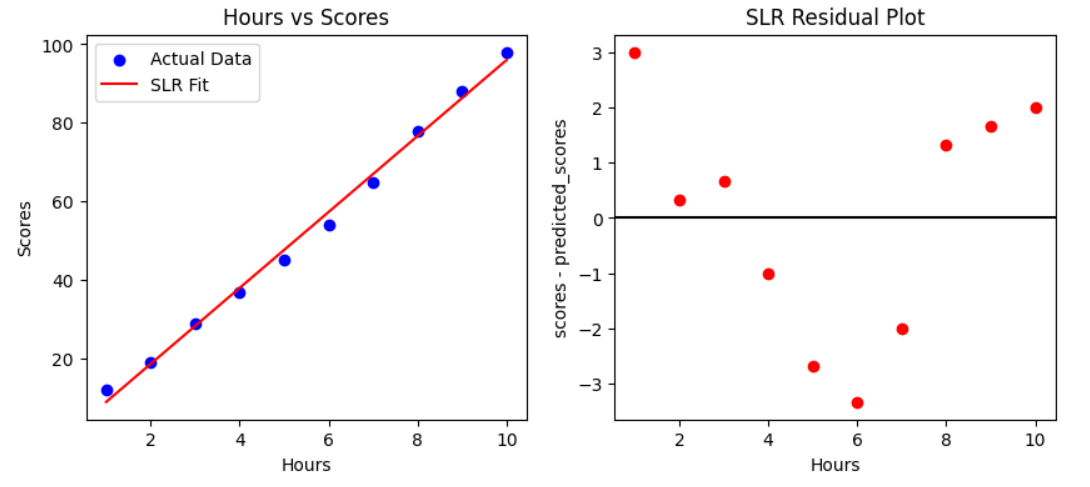

In [ ]:
Constant_MSE = 775.05
Linear_MSE = 4.133

print("Least Squares Constant Model RMSE:",
          round(np.sqrt(Constant_MSE), 3)
      )
print("Least Squares Linear Model RMSE:  ",
          round(np.sqrt(Linear_MSE), 3)
      )

R_square = (Constant_MSE - Linear_MSE) / Constant_MSE
print(f"R square: {R_square:.4}")
print("\nThis means that linear model eliminates 99.47% of constant model errors for this data.")

Least Squares Constant Model RMSE: 27.84
Least Squares Linear Model RMSE:   2.033
R square: 0.9947

This means that linear model eliminates 99.47% of constant model errors for this data.


## Transformed Simple Linear Regression

--- Model Parameters ---
Slope (theta_1):     3.5920
Intercept (theta_0): -6.1566
Equation: log(Age) = 3.59 * Length + -6.16

--- Results Table ---
   Length  Age   Log_Age  Log_Predicted  Age_Predicted  Residuals
0    1.80  1.0  0.000000       0.308972       1.362024  -0.308972
1    1.85  1.5  0.405465       0.488570       1.629983  -0.083104
2    1.90  2.0  0.693147       0.668167       1.950659   0.024980
3    2.00  3.0  1.098612       1.027363       2.793690   0.071249
4    2.10  4.5  1.504077       1.386559       4.001059   0.117518


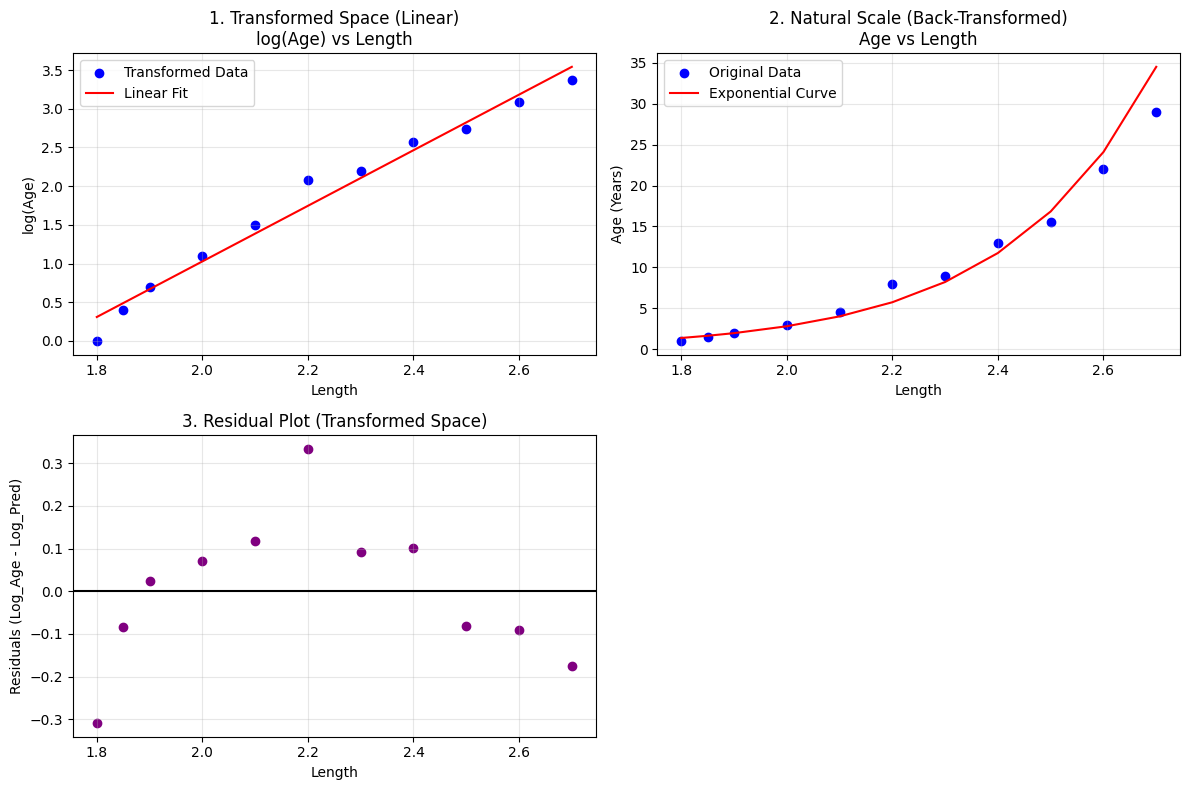

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Create the Data (Dugong Example) ---
data = {
    'Length': [1.8, 1.85, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7],
    'Age':    [1.0, 1.5,  2.0, 3.0, 4.5, 8.0, 9.0, 13.0, 15.5, 22.0, 29.0]
}
df = pd.DataFrame(data)

# --- 2. Transformation Step ---
# We transform Age because the scatter plot looked exponential.
df['Log_Age'] = np.log(df['Age'])

# --- 3. Step-by-Step SLR Calculation (on Transformed Data) ---
# Goal: Predict 'Log_Age' using 'Length'

# Calculate Means
mean_x = df['Length'].mean()
mean_y = df['Log_Age'].mean()

# Calculate Standard Deviations (ddof=1 for sample std dev)
std_x = df['Length'].std()
std_y = df['Log_Age'].std()

# Calculate Correlation (r)
r = df['Length'].corr(df['Log_Age'])

# Calculate Slope (theta_1 = r * (std_y / std_x))
theta_1 = r * (std_y / std_x)

# Calculate Intercept (theta_0 = mean_y - theta_1 * mean_x)
theta_0 = mean_y - (theta_1 * mean_x)

print("--- Model Parameters ---")
print(f"Slope (theta_1):     {theta_1:.4f}")
print(f"Intercept (theta_0): {theta_0:.4f}")
print(f"Equation: log(Age) = {theta_1:.2f} * Length + {theta_0:.2f}")

# --- 4. Making Predictions ---

# Step A: Predict in the "Log Space" (Linear Prediction)
df['Log_Predicted'] = theta_0 + (theta_1 * df['Length'])

# Step B: Back-Transform to "Natural Space" (Real Age)
# We use np.exp() to reverse the log
df['Age_Predicted'] = np.exp(df['Log_Predicted'])

# Step C: Calculate Residuals (In the Linear Space)
# We check residuals in the transformed space to ensure the linear assumption holds
df['Residuals'] = df['Log_Age'] - df['Log_Predicted']

print("\n--- Results Table ---")
print(df.head())

# --- 5. Visualization (3 Plots) ---
plt.figure(figsize=(12, 8))

# Plot 1: Transformed Space (Linear)
plt.subplot(2, 2, 1)
plt.scatter(df['Length'], df['Log_Age'], color='blue', label='Transformed Data')
plt.plot(df['Length'], df['Log_Predicted'], color='red', label='Linear Fit')
plt.title('1. Transformed Space (Linear)\nlog(Age) vs Length')
plt.xlabel('Length')
plt.ylabel('log(Age)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Natural Space (Curved)
plt.subplot(2, 2, 2)
plt.scatter(df['Length'], df['Age'], color='blue', label='Original Data')
plt.plot(df['Length'], df['Age_Predicted'], color='red', label='Exponential Curve')
plt.title('2. Natural Scale (Back-Transformed)\nAge vs Length')
plt.xlabel('Length')
plt.ylabel('Age (Years)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Residual Plot (Checking the Fit)
plt.subplot(2, 2, 3)
plt.scatter(df['Length'], df['Residuals'], color='purple')
plt.axhline(y=0, color='black', linestyle='-')
plt.title('3. Residual Plot (Transformed Space)')
plt.xlabel('Length')
plt.ylabel('Residuals (Log_Age - Log_Pred)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()